# 04 - Dimensionality Reduction

In [1]:
# All import insertions
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

from pandas import isnull
from sklearn import preprocessing
import os    # For file paths
import re    # Regular Expressions

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.feature_selection import VarianceThreshold

In [2]:
#Open files
df = pd.read_csv("../data/processed/data_bivariate.csv", low_memory=False)

In [3]:
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
stats.transpose()

,count,mean,std,min,25%,50%,75%,max,var,skew,kurt
isHomeTeam,28511.0,0.504051,0.499992,0.00,0.000,1.00,1.00,1.00,0.249992,-0.016206,-1.999878
X,28511.0,60.123478,26.207946,5.25,37.515,60.28,82.85,115.10,686.856427,-0.014068,-1.125885
Y,28511.0,26.827715,3.443716,9.35,24.090,26.84,29.55,44.74,11.859183,0.010594,-0.541048
S,28511.0,4.269283,1.043093,0.00,3.610,4.27,4.96,8.47,1.088043,-0.150453,0.406837
A,28511.0,2.646704,0.930003,0.00,2.060,2.64,3.21,14.71,0.864906,0.610211,3.837740
Orientation,28511.0,180.388089,102.543336,0.00,90.000,181.47,270.34,360.00,10515.135699,-0.018548,-1.237173
Dir,28511.0,179.955335,101.068075,0.02,91.540,184.40,272.80,359.92,10214.755720,-0.016030,-1.320505
Season,28511.0,2017.866297,0.787893,2017.00,2017.000,2018.00,2019.00,2019.00,0.620776,0.240622,-1.352983
Quarter,28511.0,2.500368,1.127628,1.00,1.000,3.00,4.00,4.00,1.271545,-0.007815,-1.381769
PossessionTeamAbbrCode,28511.0,16.917856,9.152195,1.00,9.000,17.00,25.00,32.00,83.762666,-0.076040,-1.164174


In [4]:
X = df.drop("isFirstDown",1)   #Feature Matrix
y = df["isFirstDown"]          #Target Variable

## Variance Threshhold
In Variance Threshold, the function looks at the columns variance, and eliminates the columns that don't meet the threshold.

In [5]:
thresh = 0.5
selector = VarianceThreshold(threshold=.5)
vt = selector.fit_transform(X)[0:5]

In [6]:
idx = np.where(selector.variances_ > thresh)[0]
idx

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 15, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 29, 30, 31, 32], dtype=int64)

In [7]:
# All the columns prior to Variance Threshold
X.columns

Index(['isHomeTeam', 'X', 'Y', 'S', 'A', 'Orientation', 'Dir', 'Season',
       'Quarter', 'PossessionTeamAbbrCode', 'Down', 'Distance',
       'HomeScoreBeforePlay', 'VisitorScoreBeforePlay', 'IsPossTeamInLead',
       'DefendersInTheBox', 'isPlayDirectionLeft', 'TimeSnapDiff',
       'YardsToTouchdown', 'PlayerHeightInches', 'PlayerWeight', 'Age',
       'PlayerCollegeNameCode', 'HomeTeamAbbrCode', 'VisitorTeamAbbrCode',
       'Week', 'StadiumTypeCode', 'TurfCode', 'Centers', 'Cornerbacks',
       'DefensiveEnds', 'DefensiveTackles', 'LineBackers', 'NoseTackles',
       'OffensiveGuards', 'Safeties', 'TightEnds', 'DistanceBins'],
      dtype='object')

In [8]:
# All the columns prior to Variance Threshold All the columns after the Threshold
X.loc[:, selector.get_support()].columns

Index(['X', 'Y', 'S', 'A', 'Orientation', 'Dir', 'Season', 'Quarter',
       'PossessionTeamAbbrCode', 'Distance', 'HomeScoreBeforePlay',
       'VisitorScoreBeforePlay', 'DefendersInTheBox', 'YardsToTouchdown',
       'PlayerHeightInches', 'PlayerWeight', 'Age', 'PlayerCollegeNameCode',
       'HomeTeamAbbrCode', 'VisitorTeamAbbrCode', 'Week', 'StadiumTypeCode',
       'Cornerbacks', 'DefensiveEnds', 'DefensiveTackles', 'LineBackers'],
      dtype='object')

In [9]:
# All the columns the Variance Threshold is removing
X.columns.difference(X.loc[:, selector.get_support()].columns)

Index(['Centers', 'DistanceBins', 'Down', 'IsPossTeamInLead', 'NoseTackles',
       'OffensiveGuards', 'Safeties', 'TightEnds', 'TimeSnapDiff', 'TurfCode',
       'isHomeTeam', 'isPlayDirectionLeft'],
      dtype='object')

## Backward Elimination

In [10]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)

#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues.sort_values()

Distance                  1.374457e-195
A                          2.328269e-87
S                          3.258040e-27
DistanceBins               3.898304e-14
Down                       6.508996e-12
YardsToTouchdown           6.179757e-09
DefendersInTheBox          8.138716e-06
const                      5.684958e-04
Season                     7.987120e-04
Age                        1.498027e-03
HomeTeamAbbrCode           2.829859e-03
OffensiveGuards            5.117196e-03
StadiumTypeCode            1.080001e-02
VisitorTeamAbbrCode        2.164191e-02
TightEnds                  1.129030e-01
PossessionTeamAbbrCode     2.447991e-01
IsPossTeamInLead           2.523018e-01
HomeScoreBeforePlay        2.529692e-01
isHomeTeam                 2.898463e-01
TimeSnapDiff               3.472575e-01
Y                          4.599521e-01
isPlayDirectionLeft        5.546986e-01
NoseTackles                5.618914e-01
Centers                    5.692934e-01
PlayerHeightInches         5.694145e-01


In [11]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['S', 'A', 'Season', 'Down', 'Distance', 'DefendersInTheBox', 'YardsToTouchdown', 'Age', 'HomeTeamAbbrCode', 'StadiumTypeCode', 'Cornerbacks', 'OffensiveGuards', 'DistanceBins']


## RFE (Recursive Feature Elimination)

In [12]:
model = LinearRegression()

#Initializing RFE model
rfe = RFE(model, 7)

#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  

#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False  True  True False False False False False  True  True
 False False False  True False False False False False False False False
 False False False False False False False False False  True False False
 False  True]
[14 29 22  1  1 31 30  6 15 24  1  1 25 28 13  1  8 10 20 23 27 16 32 19
 21 26 11 17 12 18  5  2  4  1  7  3  9  1]


In [13]:
#no of features
nof_list=np.arange(1,13)            
high_score=0

#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 8
Score with 8 features: 0.207071


In [14]:
cols = list(X.columns)
model = LinearRegression()

#Initializing RFE model
rfe = RFE(model, 7)

#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  

#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['S', 'A', 'Down', 'Distance', 'DefendersInTheBox', 'NoseTackles',
       'DistanceBins'],
      dtype='object')


## Embedded Method

In [15]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 0.000888
Best score using built-in LassoCV: 0.209656


In [16]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 31 variables and eliminated the other 7 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

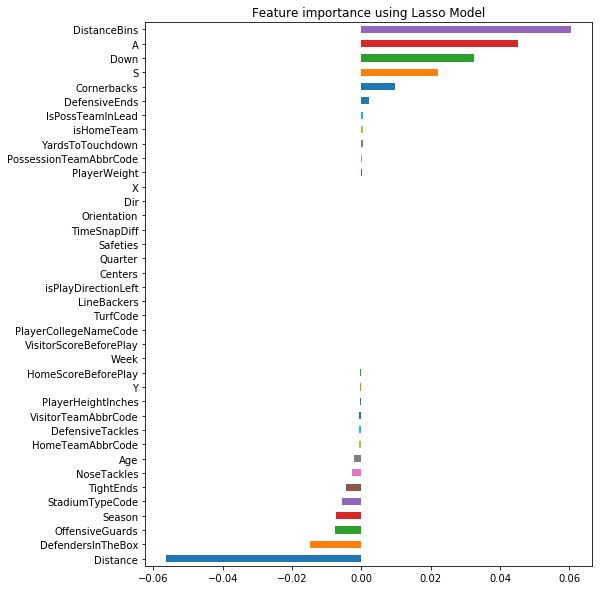

In [17]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [18]:
#imp_coef.where((imp_coef == 0)).notna()
imp_coef[imp_coef == 0].keys()

Index(['TurfCode', 'LineBackers', 'isPlayDirectionLeft', 'Centers', 'Quarter',
       'Safeties', 'TimeSnapDiff'],
      dtype='object')

In [19]:
df.drop(['Distance','Down','DistanceBins','S','A'], axis=1, inplace=True)

In [20]:
df.shape

(28511, 34)

In [21]:
df.to_csv("../data/processed/data_ready.csv", index=False)